<a href="https://colab.research.google.com/github/lamechah/Image_Classifier_HOG_SVM/blob/main/HOG_%2B_SVM_CLASSIFIER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STEP 1: Importing packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn import metrics
%matplotlib inline
import cv2
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mount the Google Drive to access the MNIST Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


##STEP 2: Dataset preparation
** Utility/Helper function to load Dataset, unzip it and return images and labels.** 
Reference: https://github.com/zalandoresearch/fashion-mnist


In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [ ]:
%cd /content/gdrive/My Drive/Deep_Learning/ASS1/data
!unzip data_ass1.zip


/content/gdrive/My Drive/Deep_Learning/ASS1/data
Archive:  data_ass1.zip
replace t10k-images-idx3-ubyte.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
ls

cache/         t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
data_ass1.zip  t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


* Use the utility function to load the dataset and split it into train and test.

In [ ]:
#Split the data (X and Y) for training and testing. 
#x represents the images and y are the labels or class names for each digit
X_train, y_train = load_mnist('/content/gdrive/My Drive/Deep_Learning/ASS1/data', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/Deep_Learning/ASS1/data', kind='t10k')

labelNames = ["0","1","2","3","4","5","6","7","8","9"]

Analyze shape of samples

In [ ]:
# The 28X28 images are flattened to feature vector of size 784
# There are 60,000 training examples in the training dataset
# There are 10,000 test sample in the testing dataset
print(np.shape(X_train))
print(np.shape(X_test))

(60000, 784)
(10000, 784)


** Reshaping the feature vector back into the 28X28 image**

In [ ]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


##Step 3: Histogram-of-Oriented Gradient (HOG) feature extraction

In [ ]:
# initialize the data matrix and labels
print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features it
  image = (X_train[img_index]) 
  H = feature.hog(image, orientations=11, pixels_per_cell=(4,4), 
                  cells_per_block=(2,2), transform_sqrt=True, block_norm="L2-Hys") 
 
  # update the data and labels
  data_train.append(H)
 
  labels_train.append(y_train[img_index]) 

print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(60000, 1584)
(60000,)


In [ ]:
img_index

59999

##Step 4. Train SVM Classifier using the training dataset 

In [ ]:
# train a SVM clasifier on the training data
# Initialize the SVM model

model = svm.SVC(C=10.0, kernel='rbf', random_state=42 ) 
# Start training the SVM classifier 
model.fit(data_train, labels_train)
 

print(np.shape(data_train))
print(np.shape(labels_train))

(60000, 1584)
(60000,)


Train set accuracy

In [ ]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

Train set Accuracy: 1.00


##Step 5. Evaluation of trained SVM model on test dataset

In [ ]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=(X_test[img_ind]) 
  H = feature.hog(img, orientations=11, pixels_per_cell=(4,4), 
                  cells_per_block=(2,2), transform_sqrt=True, block_norm="L2-Hys") 
  pred = model.predict(H.reshape(1,-1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)
  labels_test.append(y_test[img_ind])

  
print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000,)
(10000,)


Test accuracy

In [ ]:
# Test set Accuracy
accuracy = metrics.accuracy_score (y_test, predict_test)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9893


[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1131    1    1    0    0    1    0    1    0]
 [   1    2 1022    0    0    0    0    6    1    0]
 [   0    1    1 1004    0    1    0    0    2    1]
 [   0    1    0    0  977    0    1    0    0    3]
 [   2    0    0    5    0  883    2    0    0    0]
 [   2    2    0    0    1    2  950    0    1    0]
 [   0    5    7    0    1    0    0 1009    2    4]
 [   2    2    1    5    2    1    0    2  955    4]
 [   2    4    1    4    5    0    0    4    4  985]]


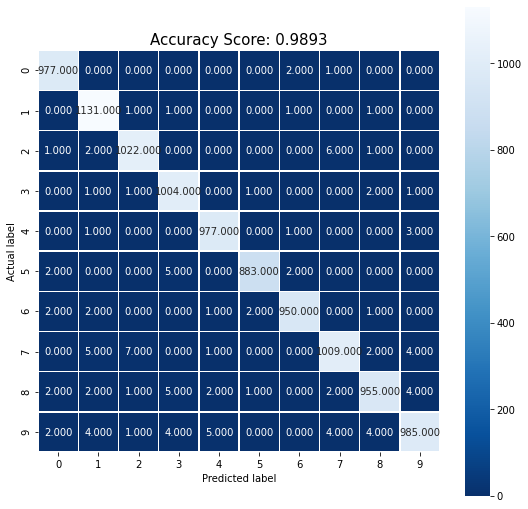

In [ ]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

##Step 6: Visualization of results

In [ ]:
images = []
orig_labels=[]
# randomly select a few testing  items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=11, pixels_per_cell=(4, 4),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H1.reshape(1, -1))[0]
  #prediction = model.predict(test_img.reshape(1, -1))
  label = labelNames[pred]
  orig_labels.append(labelNames[y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

In [ ]:
orig_labels[1]

'4'

4
7
6
4


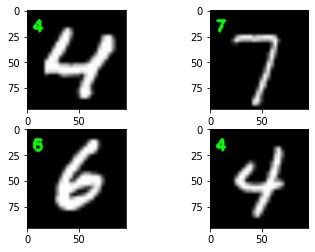

In [ ]:
## Display the classification results
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])